In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from ultralytics import SAM
from skimage import io
import os

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\ezrat\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
model = SAM("sam2_b.pt")
model.info()

100%|██████████| 154M/154M [00:17<00:00, 9.21MB/s] 


Model summary: 566 layers, 80,833,666 parameters, 80,833,666 gradients


(566, 80833666, 80833666, 0.0)

In [21]:
IMAGE = "Samples/sample_3.jpg"

In [22]:
test_image = io.imread(IMAGE)
test_image.shape

(640, 640, 3)

In [23]:
# Segment with point prompt (center of image)
results = model(IMAGE, points=[320, 320], labels=[1])


image 1/1 c:\Users\ezrat\OneDrive\Documents\GitHub\Synapxe-Tongue-Project\Data Manipulation\Segmentation\Samples\sample_3.jpg: 1024x1024 1 0, 1457.0ms
Speed: 37.3ms preprocess, 1457.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


# Segmentation from Raw Image

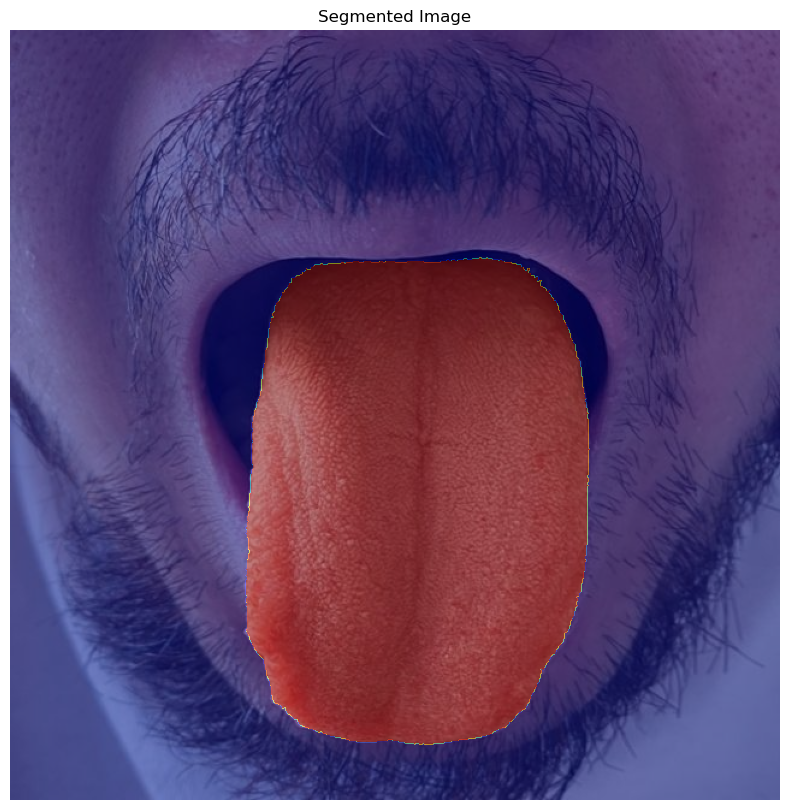

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(test_image)

# Get the mask from the results
mask = results[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image')
plt.show()

# Segmentation from PIL Object


0: 1024x1024 1 0, 1325.5ms
Speed: 12.9ms preprocess, 1325.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


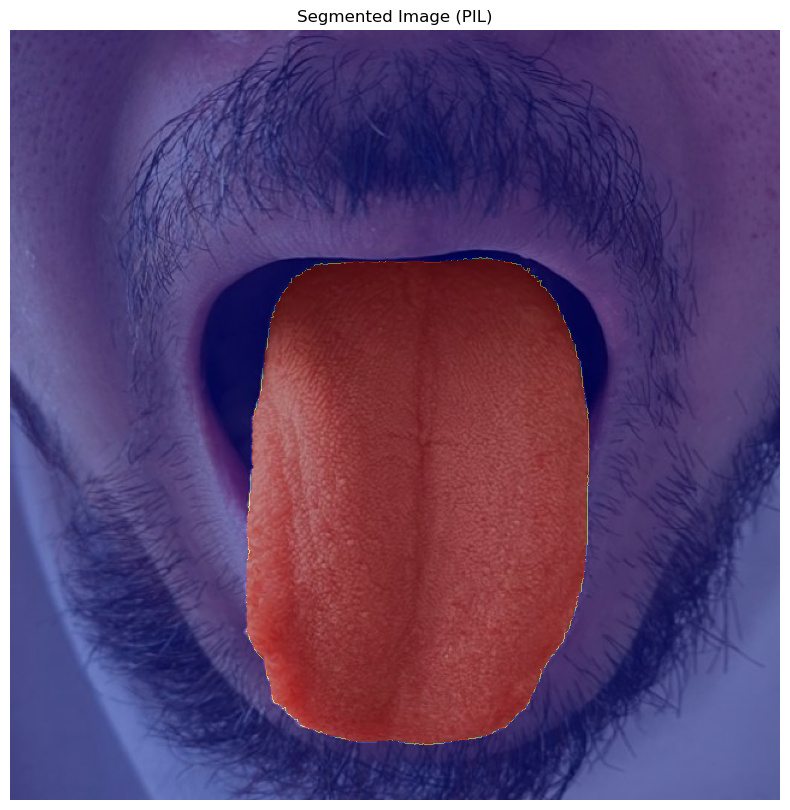

In [25]:
# Using model on PIL.JpegImagePlugin.JpegImageFile object
pil_image = Image.open(IMAGE)

# Convert PIL image to numpy array for visualization
test_image_np = np.array(pil_image)

# Segment with point prompt using the PIL image
results_pil = model(pil_image, points=[320, 320], labels=[1])

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(test_image_np)

# Get the mask from the results
mask_pil = results_pil[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask_pil, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image (PIL)')
plt.show()

# Masking

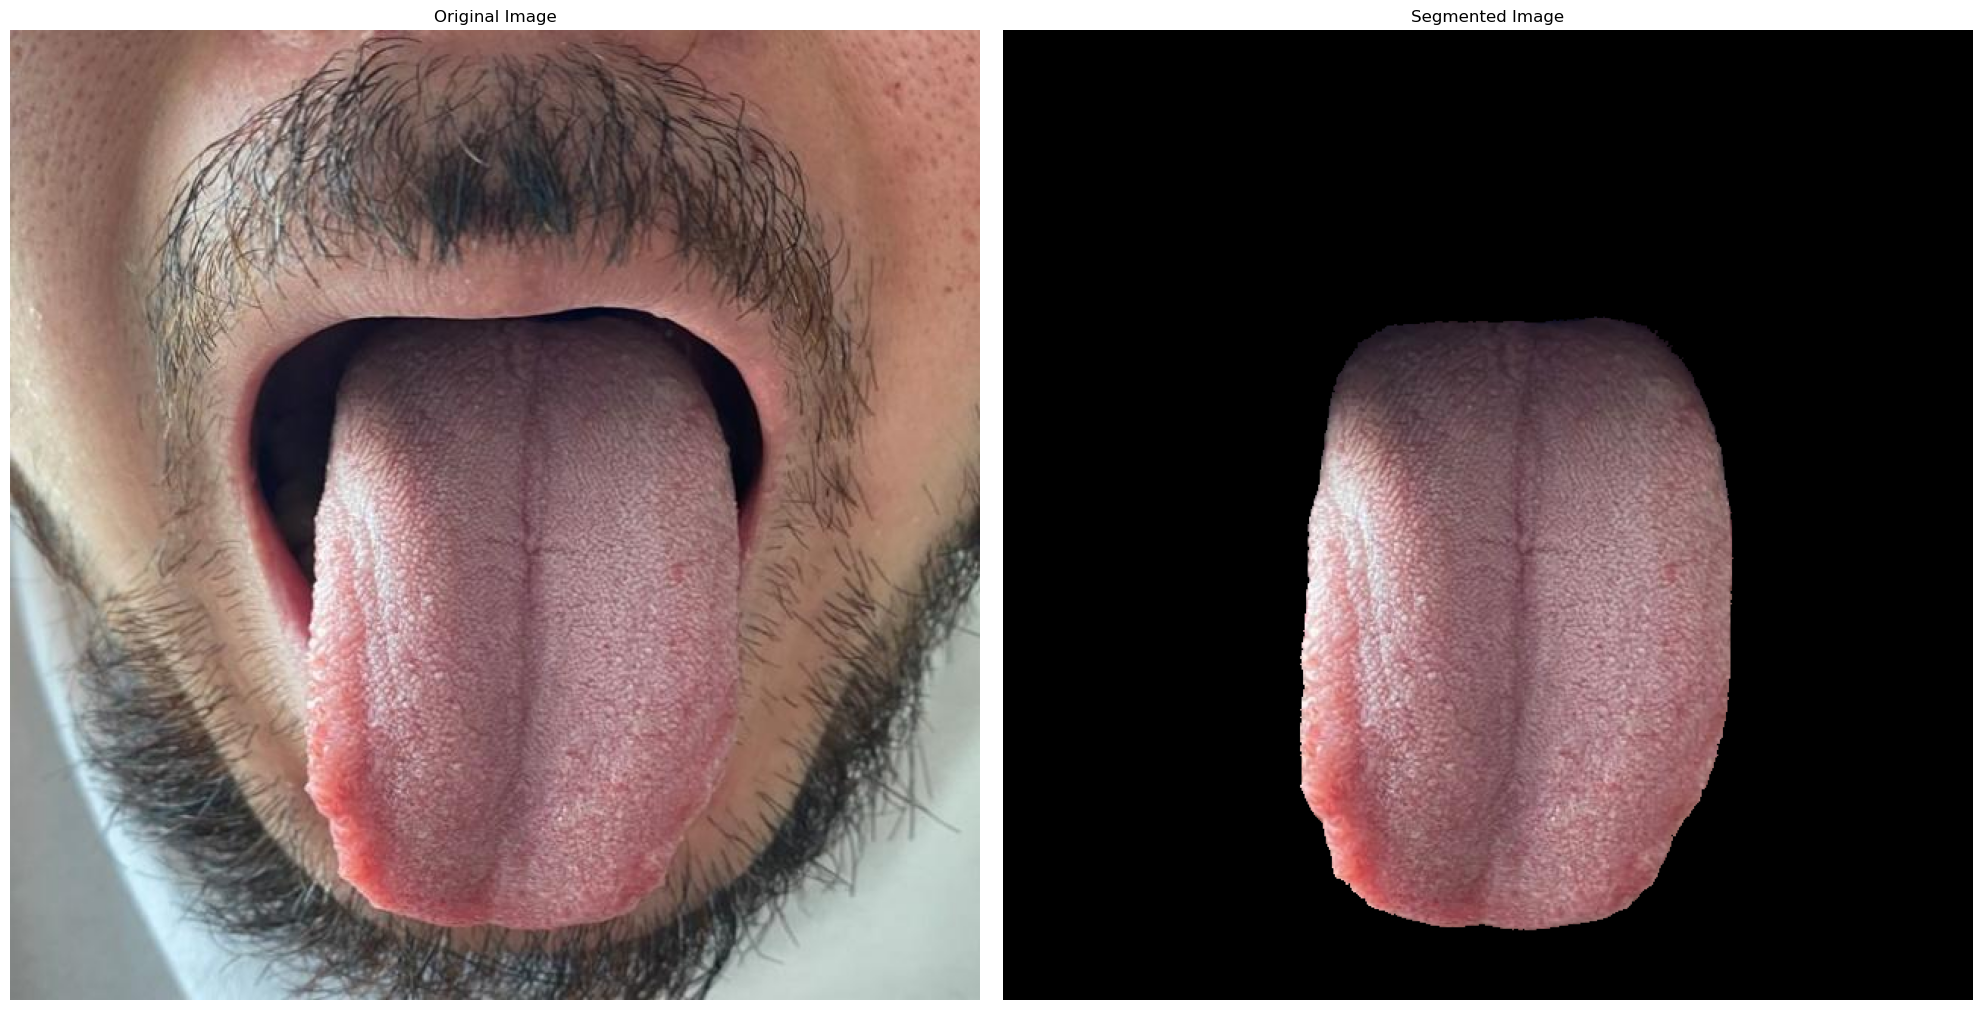

In [26]:
binary_mask = mask_pil > 0.5

rgb_mask = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)
segmented_image = test_image_np * rgb_mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(test_image_np)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(segmented_image)
ax2.set_title('Segmented Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [27]:
output_dir = "Output"
os.makedirs(output_dir, exist_ok=True)

segmented_image_output = Image.fromarray(segmented_image, mode='RGB')
output_path = os.path.join(output_dir, "segmented_" + IMAGE.split("/")[-1])
segmented_image_output.save(output_path)

print(f"Segmented image saved to: {output_path}")

Segmented image saved to: Output\segmented_sample_3.jpg
